# **REVERSE IMAGE SEARCH CONSTRUCTOR - DATA LOAD & REVIEW**

# IMPORTS

In [7]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

# UTILITIES

In [2]:
extensions = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG']


def get_file_paths(dataset_path):
    file_list = []
    for root, directories, filenames in os.walk(dataset_path):
        for filename in filenames:
            if any(ext in filename for ext in extensions):
                filepath = os.path.join(root, filename)
                if os.path.exists(filepath):
                  file_list.append(filepath)
                else:
                  print(filepath)
    return file_list

# DATA DOWNLOAD

In [3]:
os.makedirs('/content/caltech101', exist_ok=True)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   476  100   476    0     0   1578      0 --:--:-- --:--:-- --:--:--  1576
100  131M  100  131M    0     0  34.6M      0  0:00:03  0:00:03 --:--:-- 41.1M
Archive:  /content/caltech101/caltech-101.zip
   creating: /content/caltech101/caltech-101/
  inflating: /content/caltech101/__MACOSX/._caltech-101  
  inflating: /content/caltech101/caltech-101/101_ObjectCategories.tar.gz  
  inflating: /content/caltech101/__MACOSX/caltech-101/._101_ObjectCategories.tar.gz  
  inflating: /content/caltech101/caltech-101/show_annotation.m  
  inflating: /content/caltech101/__MACOSX/caltech-101/._show_annotation.m  
  inflating: /content/caltech101/caltech-101/Annotations.tar  
  inflating: /content/caltech101/__MACOSX/caltech-101/._Annotations.tar  


Use the following commands on the terminal to downloand data, unzip it and remove irrelevant directories

!curl -L "https://data.caltech.edu/records/mzrjq-6wc02/files/caltech-101.zip?download=1" -o "/content/caltech101/caltech-101.zip"
!unzip "/content/caltech101/caltech-101.zip" -d "/content/caltech101/"
!tar -xzf /content/caltech101/caltech-101/101_ObjectCategories.tar.gz -C /content/caltech101/caltech-101/
!rm -rf /content/101_ObjectCategories/BACKGROUND_Google
!rm -rf /content/caltech101/__MACOSX
!rm -rf /content/caltech101/caltech-101.zip
!rm -rf /content/caltech101/caltech-101/101_ObjectCategories/BACKGROUND_Google

# DATA REVIEW

In [4]:
dataset_path = '/content/caltech101/caltech-101/101_ObjectCategories/'

filenames = sorted(get_file_paths(dataset_path))
print(f'There are {len(filenames)} files in the dataset.\n')

classes = []
for d in os.listdir(dataset_path):
    if os.path.isdir(os.path.join(dataset_path, d)):
        classes.append(d)

class_counts = []
for cls in classes:
    class_dir = os.path.join(dataset_path, cls)
    files = os.listdir(class_dir)
    count = 0
    for f in files:
        if os.path.isfile(os.path.join(class_dir, f)):
            count += 1
    class_counts.append((cls, count))

class_counts.sort(key=lambda x: x[1], reverse=True)

print("Top 10 classes by number of images:")
for i in range(10):
    cls, count = class_counts[i]
    print(f"{cls:<25} - {count:>5}")

There are 8677 files in the dataset.

Top 10 classes by number of images:
airplanes                 -   800
Motorbikes                -   798
Faces                     -   435
Faces_easy                -   435
watch                     -   239
Leopards                  -   200
bonsai                    -   128
car_side                  -   123
ketch                     -   114
chandelier                -   107


Displaying 5 random images from top 3 classes:


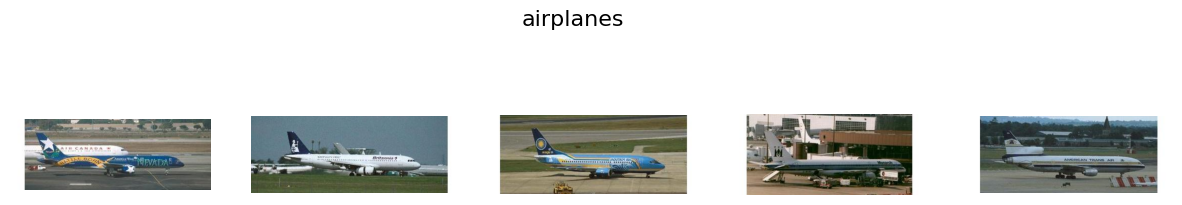

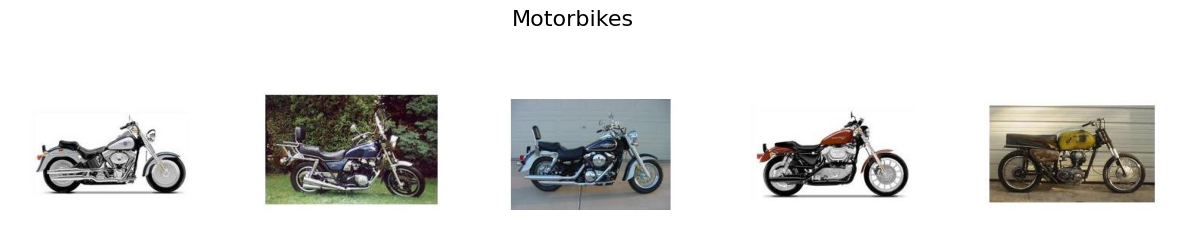

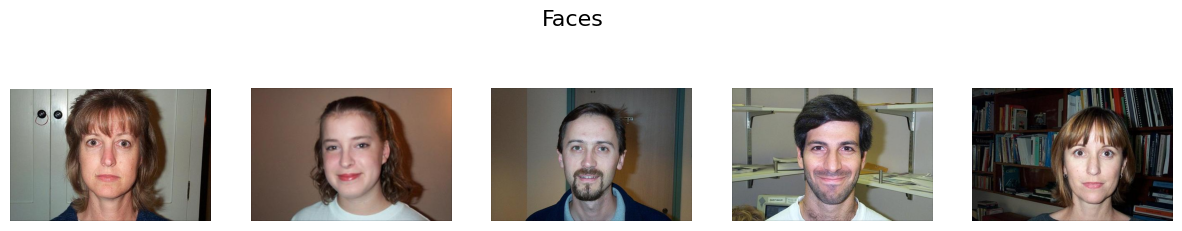

In [5]:
print("Displaying 5 random images from top 3 classes:")

for i in range(3):
    cls, count = class_counts[i]
    class_dir = os.path.join(dataset_path, cls)
    images = []
    for f in os.listdir(class_dir):
        if os.path.isfile(os.path.join(class_dir, f)):
            images.append(f)
    random_images = random.sample(images, min(5, len(images)))

    plt.figure(figsize=(15,3))
    plt.suptitle(cls, fontsize=16)
    for j, img_name in enumerate(random_images):
        img_path = os.path.join(class_dir, img_name)
        img = mpimg.imread(img_path)
        plt.subplot(1, 5, j+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

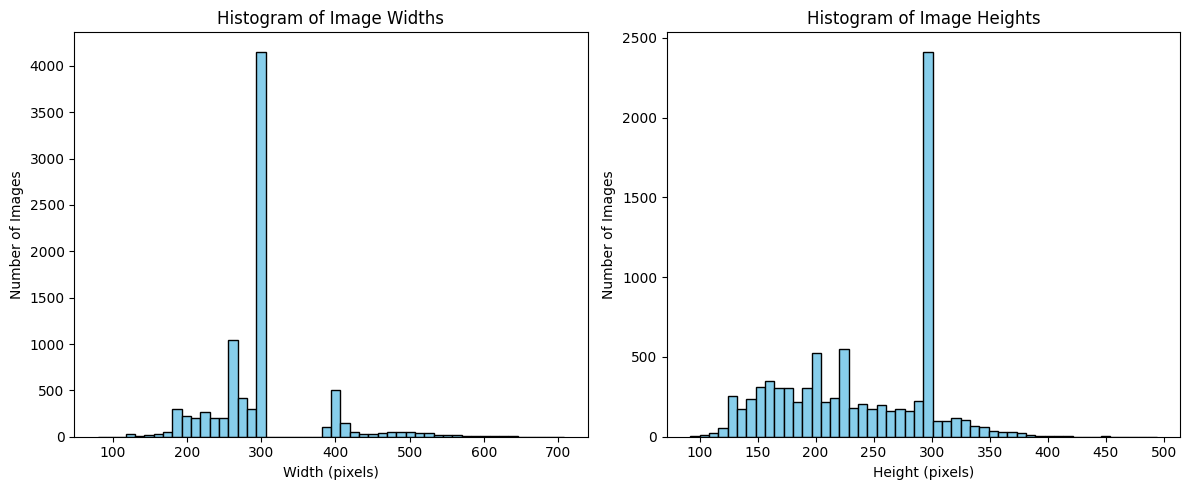

In [8]:
widths = []
heights = []

for cls in classes:
    class_dir = os.path.join(dataset_path, cls)
    for filename in os.listdir(class_dir):
        filepath = os.path.join(class_dir, filename)
        if os.path.isfile(filepath):
            try:
                img = Image.open(filepath)
                w, h = img.size
                widths.append(w)
                heights.append(h)
            except:
                pass

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(widths, bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Image Widths')
plt.xlabel('Width (pixels)')
plt.ylabel('Number of Images')

plt.subplot(1,2,2)
plt.hist(heights, bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Image Heights')
plt.xlabel('Height (pixels)')
plt.ylabel('Number of Images')

plt.tight_layout()
plt.show()